# include python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import sklearn.metrics

## Exploratory Data Ananlysis

In [2]:
data = pd.read_csv("milknew.csv")

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
data.describe(include="all")
data.columns=["pH","Temprature","Taste","Odor","Fat","Turbidity","Colour","Grade"]

In [7]:
data["Grade"]= data["Grade"].replace(["low"],0)
data["Grade"]= data["Grade"].replace(["medium"],1)
data["Grade"]= data["Grade"].replace(["high"],2)

In [8]:
column_names=["pH","Temprature","Taste","Odor","Fat","Turbidity","Colour","Grade"]
grade =["low","medium","high"]

In [9]:
data_train,data_test = train_test_split(data,test_size=0.2,random_state =42)

In [10]:
features = data.drop(['pH', 'Grade'], axis=1)
target = data['Grade']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2,random_state=42)
xtrain.shape, xtest.shape

((847, 6), (212, 6))

In [11]:
data_train.shape

(847, 8)

In [12]:
data_test.shape

(212, 8)

In [13]:
train_y=data_train.pop("Grade")
test_y=data_test.pop("Grade")

In [14]:
train_y.head()

331     1
44      1
307     2
323     0
1009    0
Name: Grade, dtype: int64

In [15]:
data_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250


# Accuracy Using SVM Classifier

Test set Accuracy =  0.7735849056603774


<AxesSubplot:>

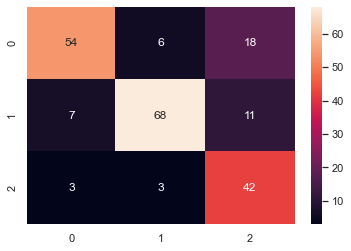

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(xtrain, ytrain)
svm_predictions = svm_model_linear.predict(xtest)
 
accuracy = svm_model_linear.score(xtest, ytest)
print("Test set Accuracy = ",accuracy)
cm = confusion_matrix(ytest, svm_predictions)
sns.heatmap(cm,annot= True)

# Accuracy Using KNN Classifier

Test set Accuracy =  0.8679245283018868


<AxesSubplot:>

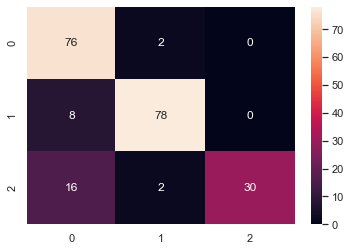

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(xtrain, ytrain)
  
accuracy = knn.score(xtest, ytest)
print("Test set Accuracy = ",accuracy)
  
knn_predictions = knn.predict(xtest) 
cm = confusion_matrix(ytest, knn_predictions)
sns.heatmap(cm,annot= True)


# Accuracy Using Decision Tree Classifier

Test set Accuracy =  0.8915094339622641


<AxesSubplot:>

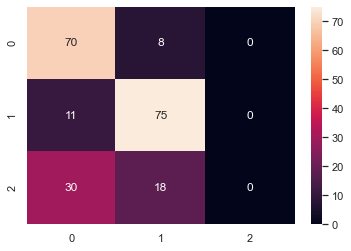

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(xtrain, ytrain)
dtree_predictions = dtree_model.predict(xtest)
clf = DecisionTreeClassifier()
clf = clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
accuracy = metrics.accuracy_score(ytest, ypred)
print("Test set Accuracy = ",accuracy)

cm = confusion_matrix(ytest, dtree_predictions)
sns.heatmap(cm,annot= True)